<a href="https://colab.research.google.com/github/Niteesh57/Demo_git/blob/main/16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df  = pd.read_csv("/content/train.csv",encoding='latin-1')

In [7]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [8]:
#No-null values in the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24832 entries, 0 to 24831
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   textID           24832 non-null  object 
 1   text             24831 non-null  object 
 2   selected_text    24830 non-null  object 
 3   sentiment        24831 non-null  object 
 4   Time of Tweet    24831 non-null  object 
 5   Age of User      24831 non-null  object 
 6   Country          24831 non-null  object 
 7   Population       24831 non-null  float64
 8   Land Area        24831 non-null  float64
 9   Density (P/Km²)  24831 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.9+ MB


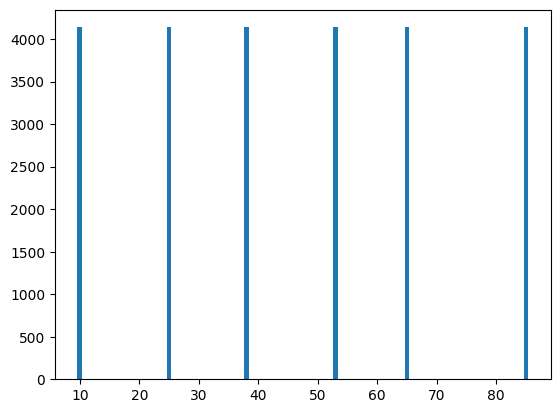

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

# Define a function to convert the string ranges to integer averages
def convert_range_to_average(range_str):
    if isinstance(range_str, str):  # Check if it's a string
        # Split the range string by '-'
        parts = range_str.split('-')

        # Convert the parts to integers
        lower = int(parts[0])
        upper = int(parts[1])

        # Calculate the average
        average = (lower + upper) // 2

        return average
    else:
        return range_str  # Return the original value if it's not a string

data21 = []
for i in df["Age of User"]:
    average1 = convert_range_to_average(i)
    data21.append(average1)

pic1 = Counter(data21)
x_values = list(pic1.keys())
y_values = list(pic1.values())

# Create a bar chart
plt.bar(x_values, y_values)
plt.show()


In [16]:
data24 = df["Country"].unique().tolist()
print(data24,end = " ")

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Congo-Brazzaville)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia (Czech Republic)', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini (fmr. "Swaziland")', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',

In [17]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
new_sent = ''
for token in df['text'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

'what better way to spoil mum than to let her kick back and relax over a nice meal and a bottle of her favorite wine? our wine wa a red '

In [19]:
pip install contractions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.5 MB/s eta 0:00:00


In [20]:
import re
import contractions
contractions.fix(df['text'][24])

'SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cALLed LoSe f0LloWeRs FridAy... smH'

In [21]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [22]:
cleaned_tweets = []  # list of cleaned tweets
for twt in df['text']:
    if isinstance(twt, str):
        cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))


In [23]:
# Ensure the lengths match by either dropping or adding a row
if len(df) == len(cleaned_tweets):
    df['new_text'] = cleaned_tweets
else:
    # Handle the mismatch by either dropping or adding a row
    # For example, you can drop the last row from the DataFrame
    df = df.iloc[:-1]
    df['new_text'] = cleaned_tweets
df.head()

<ipython-input-23-ce6e41296451>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_text'] = cleaned_tweets


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density (P/Km²),new_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,i d have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,my bos is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0,son of why couldn t they put them on the relea...


In [24]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [26]:
corpus=[]
for i in range(0, len(df)):
  review=re.sub('[^a-zA-Z]0-9',' ', str(df["text"][i]))
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [27]:
corpus

['i`d responded, go',
 'sooo sad miss san diego!!!',
 'boss bulli me...',
 'interview! leav alon',
 'son ****, couldn`t put releas alreadi bought',
 'http://www.dothebouncy.com/smf - shameless plug best ranger forum earth',
 '2am feed babi fun smile coo',
 'soooo high',
 '',
 'journey!? wow... u becam cooler. hehe... (i possible!?)',
 'much love hopeful, reckon chanc minim =p i`m never gonna get cake stuff',
 'realli realli like song love stori taylor swift',
 'sharpi run danger low ink',
 'want go music tonight lost voice.',
 'test test lg env2',
 'uh oh, sunburn',
 's`ok, tri plot altern speak *sigh*',
 'i`v sick past day thus, hair look wierd. didnt hat would look... http://tinyurl.com/mnf4kw',
 'back home gonna miss everi one',
 'he',
 'oh marly, i`m sorry!! hope find soon!! <3 <3',
 'play ghost onlin realli interesting. new updat kirin pet metamorph third job. can`t wait dragon pet',
 'clean hous famili com later today..',
 'gotta restart comput .. thought win7 suppos put end cons

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=2500,ngram_range=(1,2))
X=tv.fit_transform(corpus).toarray()
y=np.array(df['sentiment'])

In [29]:
from imblearn.over_sampling import RandomOverSampler

rs=RandomOverSampler()
X,y=rs.fit_resample(X,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import AdaBoostClassifier

Abc = AdaBoostClassifier(n_estimators=7, random_state=9)
Abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=7, random_state=9)

In [40]:
predict = Abc.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print('Accuracy of LogisticRegression',accuracy_score(y_test,predict)*100)

Accuracy of LogisticRegression 48.71495327102804
